In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('a1_data/a1_d2.csv', header=None)
data

,0,1,2,3
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [2]:
X_data = []
Y_data = []
positive = []
negative = []


x, y = data.shape
for i in range(x):
    d = data.iloc[i][:3]
    t = data.iloc[i][3]
    X_data.append(d)
    Y_data.append(t)
    if t==1:
        positive.append(d)
    else:
        negative.append(d)
    
X_data = np.array(X_data, dtype='float32')
Y_data = np.array(Y_data, dtype='int32')
positive = np.array(positive, dtype='float32')
negative = np.array(negative, dtype='float32')

In [3]:
mean_p = np.mean(positive, axis=0)
mean_n = np.mean(negative, axis=0)

In [4]:
diff = abs(mean_p - mean_n)

In [5]:
x, y = positive.shape
s1 = np.zeros((y, y))

for i in range(x):
    a = positive[i] - mean_p
    b = a.reshape(y, 1)
    a = a.reshape(1, y)
    s1 = s1 + np.dot(b, a)

In [6]:
x, y = negative.shape
s2 = np.zeros((y, y))

for i in range(x):
    a = negative[i] - mean_n
    b = a.reshape(y, 1)
    a = a.reshape(1, y)
    s2 = s2 + np.dot(b, a)

In [7]:
s = s1 + s2
s = np.linalg.inv(s)
diff.resize(y, 1)
final = np.dot(s, diff)

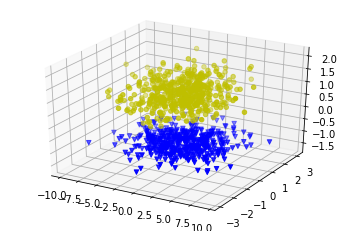

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(positive[:, 0], positive[:, 1], positive[:, 2], c='y', marker='o')
ax.scatter(negative[:, 0], negative[:, 1], negative[:, 2], c='b', marker='v')

plt.show()

In [9]:
xp = 1
yp = 2

a,b,c,d = final[0][0], final[1][0], final[2][0], 0
zp = (d - a*xp - b*yp) / c

In [10]:
t = np.linspace(-80, 80, 40)
xnew = a*t + xp
ynew = b*t + yp
znew = c*t + zp

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

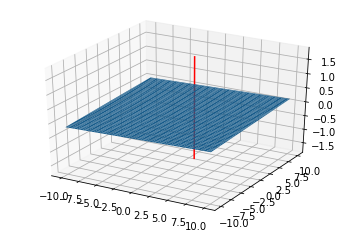

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a,b,c,d = final[0][0], final[1][0], final[2][0], 0

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

# plot the surface
surf = ax.plot_surface(X, Y, Z)
ax.plot3D(xnew, ynew, znew, 'red')

plt.show()

In [13]:
x, y = positive.shape
finalpositive = []

for i in range(x):
    d = a*positive[i][0] + b*positive[i][1] + c*positive[i][2]
    t = -(a*xp + b*yp + c*zp + d)/(a**2 + b**2 + c**2)
    xx = a*t + xp
    yy = b*t + yp
    zz = c*t + zp
    finalpositive.append([xx, yy, zz])
finalpositive = np.array(finalpositive)

In [14]:
x, y = negative.shape
finalnegative = []

for i in range(x):
    d = a*negative[i][0] + b*negative[i][1] + c*negative[i][2]
    t = -(a*xp + b*yp + c*zp + d)/(a**2 + b**2 + c**2)
    xx = a*t + xp
    yy = b*t + yp
    zz = c*t + zp
    finalnegative.append([xx, yy, zz])
finalnegative = np.array(finalnegative)

In [15]:
x1, y1, z1 = np.mean(finalpositive, axis=0)
x2, y2, z2 = np.mean(finalnegative, axis=0)
xp = (x1 + x2)/2
yp = (y1 + y2)/2
zp = (z1 + z2)/2

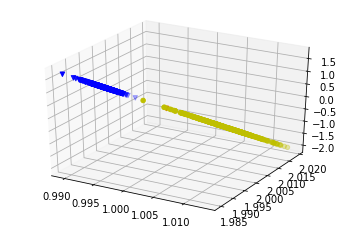

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(finalpositive[:, 0], finalpositive[:, 1], finalpositive[:, 2], c='y', marker='o')
ax.scatter(finalnegative[:, 0], finalnegative[:, 1], finalnegative[:, 2], c='b', marker='v')
ax.scatter(xp, yp, zp, c='r', marker='v')
# for angle in range(0, 360):
#     ax.view_init(45, angle)
#     plt.draw()
#     plt.pause(0.001)

plt.show()

In [17]:
x, y = finalpositive.shape
correct = 0
acpos = 0
for i in range(x):
    if finalpositive[i][2] < zp:
        acpos = acpos + 1
        correct = correct + 1
        
x, y = finalnegative.shape
acneg = 0
for i in range(x):
    if finalnegative[i][2] > zp:
        correct = correct + 1
        acneg = acneg + 1
        
totpos, _ = positive.shape
totneg, _ = negative.shape

In [18]:
accuracy = correct / (totpos + totneg) * 100
precision1 = acneg / totneg
x, y = finalnegative.shape
recall1 = acneg / x
fscore1 = (2*recall1*precision1) / (recall1 + precision1)

In [19]:
precision2 = acpos / totpos
x, y = finalpositive.shape
recall2 = acpos / x
fscore2 = (2*recall2*precision2) / (recall2 + precision2)

In [20]:
fscore = (fscore1 + fscore2)/2
fscore, accuracy

(0.997, 99.7)